# SCOP annotation transfer 

In [1]:
import numpy as np
import pandas as pnd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
tables = {}
for filename in Path("rocx_files_benchmark").glob("*.rocx"):
    table = pnd.read_table(filename)
    tables[filename.stem] = table

In [3]:
names = ['dali', 'foldseekTM', 'foldseek','CLE-sw', 'ProstT5_EBA_min_SCOPE', 'plain_ProstT5_EBA_min_SCOPE',
         'ProstT5_AD_SCOPE', 'mmseqs2']


legend = {'ProstT5_EBA_min_SCOPE':'EBA', 'plain_ProstT5_EBA_min_SCOPE':'EBA-plain', 
         'ProstT5_AD_SCOPE':'AD','mmseqs2':'MMseqs2','dali':'DALI', 
        'foldseekTM':'Foldseek-TM', 'foldseek':'Foldseek','CLE-sw':'CLE-SW',}

colors = {"dali":"tab:brown","TMalign":"#3B76AF","foldseek":"tab:pink",'foldseekTM':"teal","CLE-sw":"#EE8632",
          "mmseqs2":"#F4C27B", "ProstT5_EBA_min_SCOPE":"tab:purple", "plain_ProstT5_EBA_min_SCOPE":"lightcoral",  
          "ProtT5_EBA_min_SCOPE":"tab:pink", "plain_ProtT5_EBA_min_SCOPE":"tab:purple", 
          "ESMb1_EBA_min_SCOPE":"tab:blue", "plain_ESMb1_EBA_min_SCOPE":"tab:blue", 'ProstT5_AD_SCOPE':'firebrick'}

linestyle = {"dali":"-.","TMalign":"-.","foldseek":"-.",'foldseekTM':"-.","CLE-sw":"-.",
          "mmseqs2":"-", "ProstT5_EBA_min_SCOPE":"-", "plain_ProstT5_EBA_min_SCOPE":"-",  
          "ProtT5_EBA_min_SCOPE":"-", "plain_ProtT5_EBA_min_SCOPE":"-", 
          "ESMb1_EBA_min_SCOPE":"-", "plain_ESMb1_EBA_min_SCOPE":"-", 'ProstT5_AD_SCOPE':'-'}

markers = {"dali":"X","TMalign":"X","foldseek":"X","CLE-sw":"X",'foldseekTM':"X",
           "mmseqs2":"o", "ProstT5_EBA_min_SCOPE":"o", "plain_ProstT5_EBA_min_SCOPE":"o", 'ProstT5_AD_SCOPE':'o'}


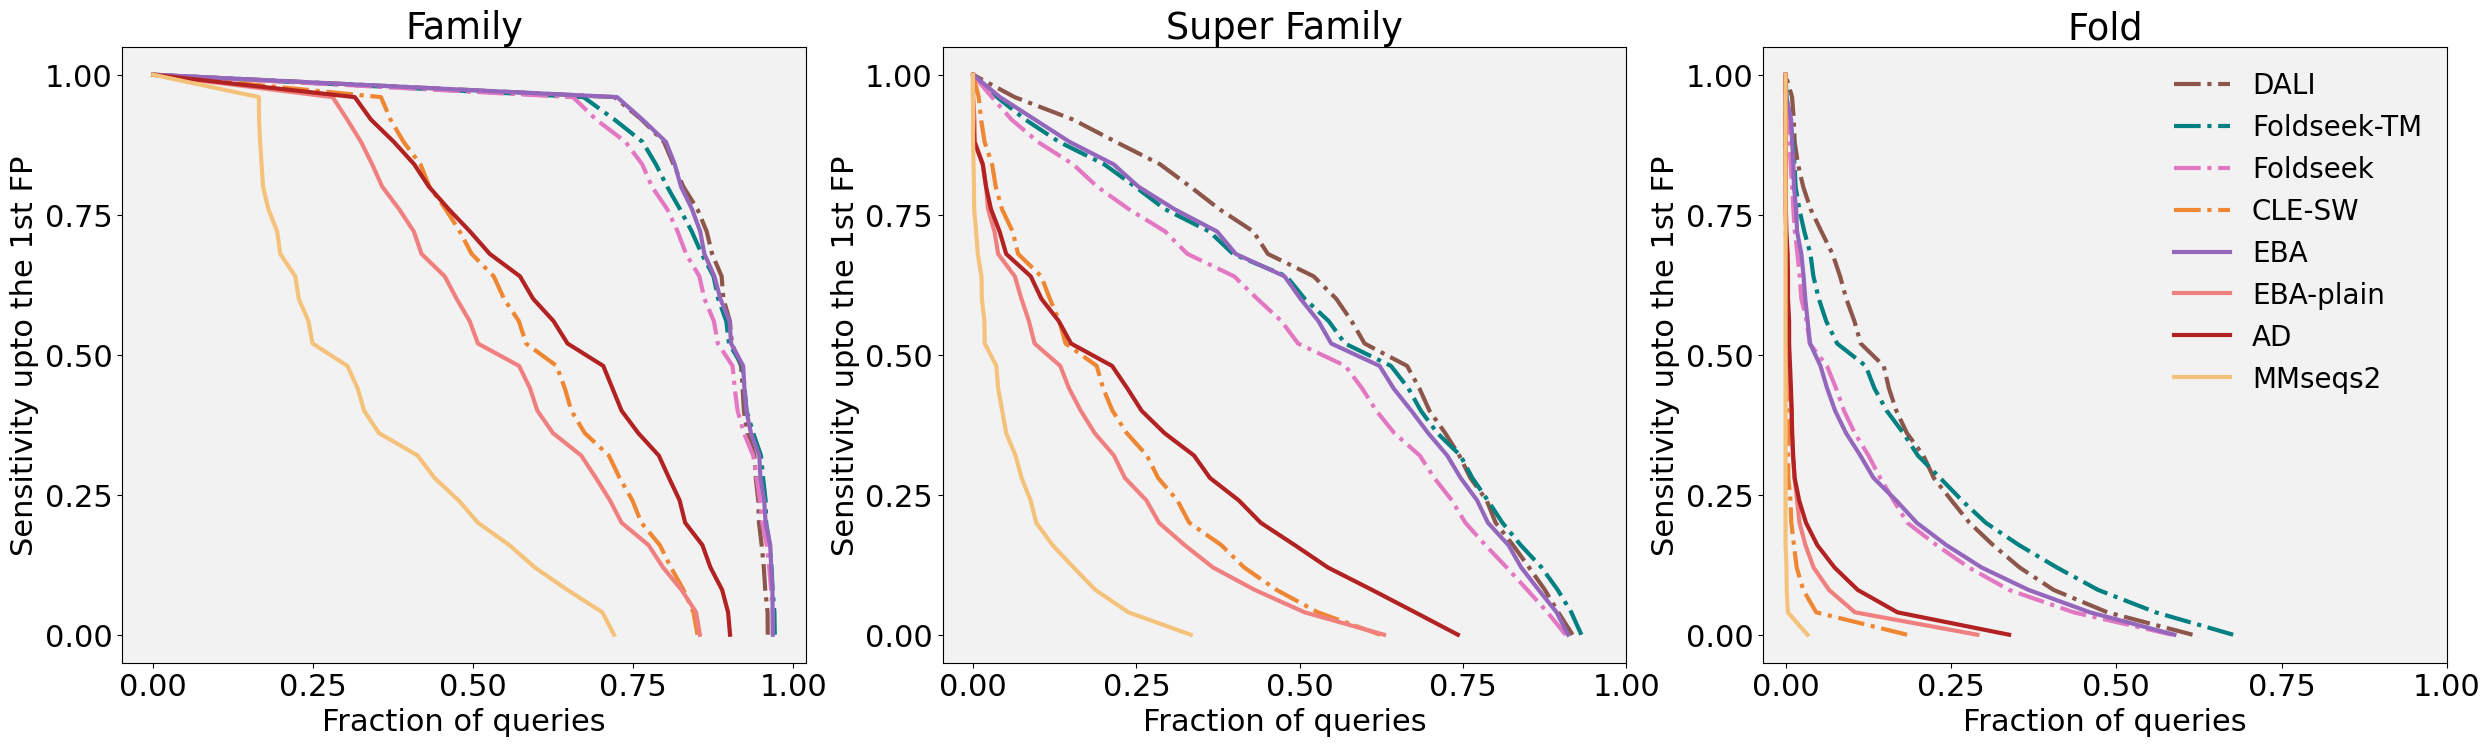

In [5]:
plt.rcParams.update({'font.size': 22})
background_color = '#F2F2F2'
fig, axs = plt.subplots(1, 3, figsize=(30, 8))
for ax, plot_type, plot_name in zip(axs, ["FAM", "SFAM", "FOLD"], ["Family", "Super Family", "Fold"]):
    ax.set_facecolor(background_color)
    for label in names:
        x = []
        y = []
        for i in np.arange(0., 1.04, 0.04):
            x.append(sum(tables[label][plot_type] > i) / len(tables[label][plot_type]))
            y.append(i)
        ax.plot(x, y, label=legend[label], color=colors[label], linestyle=linestyle[label], linewidth=3, markersize=8)
    ax.set_xticks(np.arange(0, 1.25, 0.25));
    ax.set_yticks(np.arange(0, 1.25, 0.25));
    ax.set_xlabel("Fraction of queries")
    ax.set_ylabel("Sensitivity upto the 1st FP")
    ax.set_title(plot_name)
    #ax.spines[['right', 'top']].set_visible(False)
axs[-1].legend(fontsize=20, frameon=False);
#plt.savefig('plots/SCOP_label_transfer.png', dpi=600)

### pLMs comparison

In [13]:
names_pLMs = ['ProstT5_EBA_min_SCOPE', 'plain_ProstT5_EBA_min_SCOPE', 'ProstT5_AD_SCOPE',
             'ProtT5_EBA_min_SCOPE', 'plain_ProtT5_EBA_min_SCOPE', 'ProtT5_AD_SCOPE',
             'ESMb1_EBA_min_SCOPE', 'plain_ESMb1_EBA_min_SCOPE', 'ESMb1_AD_SCOPE']

legend = {'ProstT5_EBA_min_SCOPE':'EBA-ProstT5', 'plain_ProstT5_EBA_min_SCOPE':'EBA-plain-ProstT5', 
          'ProtT5_EBA_min_SCOPE':'EBA-ProtT5', 'plain_ProtT5_EBA_min_SCOPE':'EBA-plain-ProstT5', 'ESMb1_EBA_min_SCOPE':'EBA-ESM1b', 
             'plain_ESMb1_EBA_min_SCOPE':'EBA-plain-ESM1b', 'ProtT5_AD_SCOPE':'AD-ProtT5','ProstT5_AD_SCOPE':'AD-ProstT5','ESMb1_AD_SCOPE':'AD-ESM1b'}

colors = {"ProstT5_EBA_min_SCOPE":"tab:purple", "plain_ProstT5_EBA_min_SCOPE":"tab:purple",  
          "ProtT5_EBA_min_SCOPE":"tab:pink", "plain_ProtT5_EBA_min_SCOPE":"tab:pink", 
          "ESMb1_EBA_min_SCOPE":"skyblue", "plain_ESMb1_EBA_min_SCOPE":"skyblue", 'ProtT5_AD_SCOPE':'tab:pink',
          'ProstT5_AD_SCOPE':"tab:purple", 'ESMb1_AD_SCOPE':"skyblue",}

linestyle = {"ProstT5_EBA_min_SCOPE":"-", "plain_ProstT5_EBA_min_SCOPE":":",  
          "ProtT5_EBA_min_SCOPE":"-", "plain_ProtT5_EBA_min_SCOPE":":", 
          "ESMb1_EBA_min_SCOPE":"-", "plain_ESMb1_EBA_min_SCOPE":":", 'ProtT5_AD_SCOPE':'--',
           'ProstT5_AD_SCOPE':'--','ESMb1_AD_SCOPE':'--' }

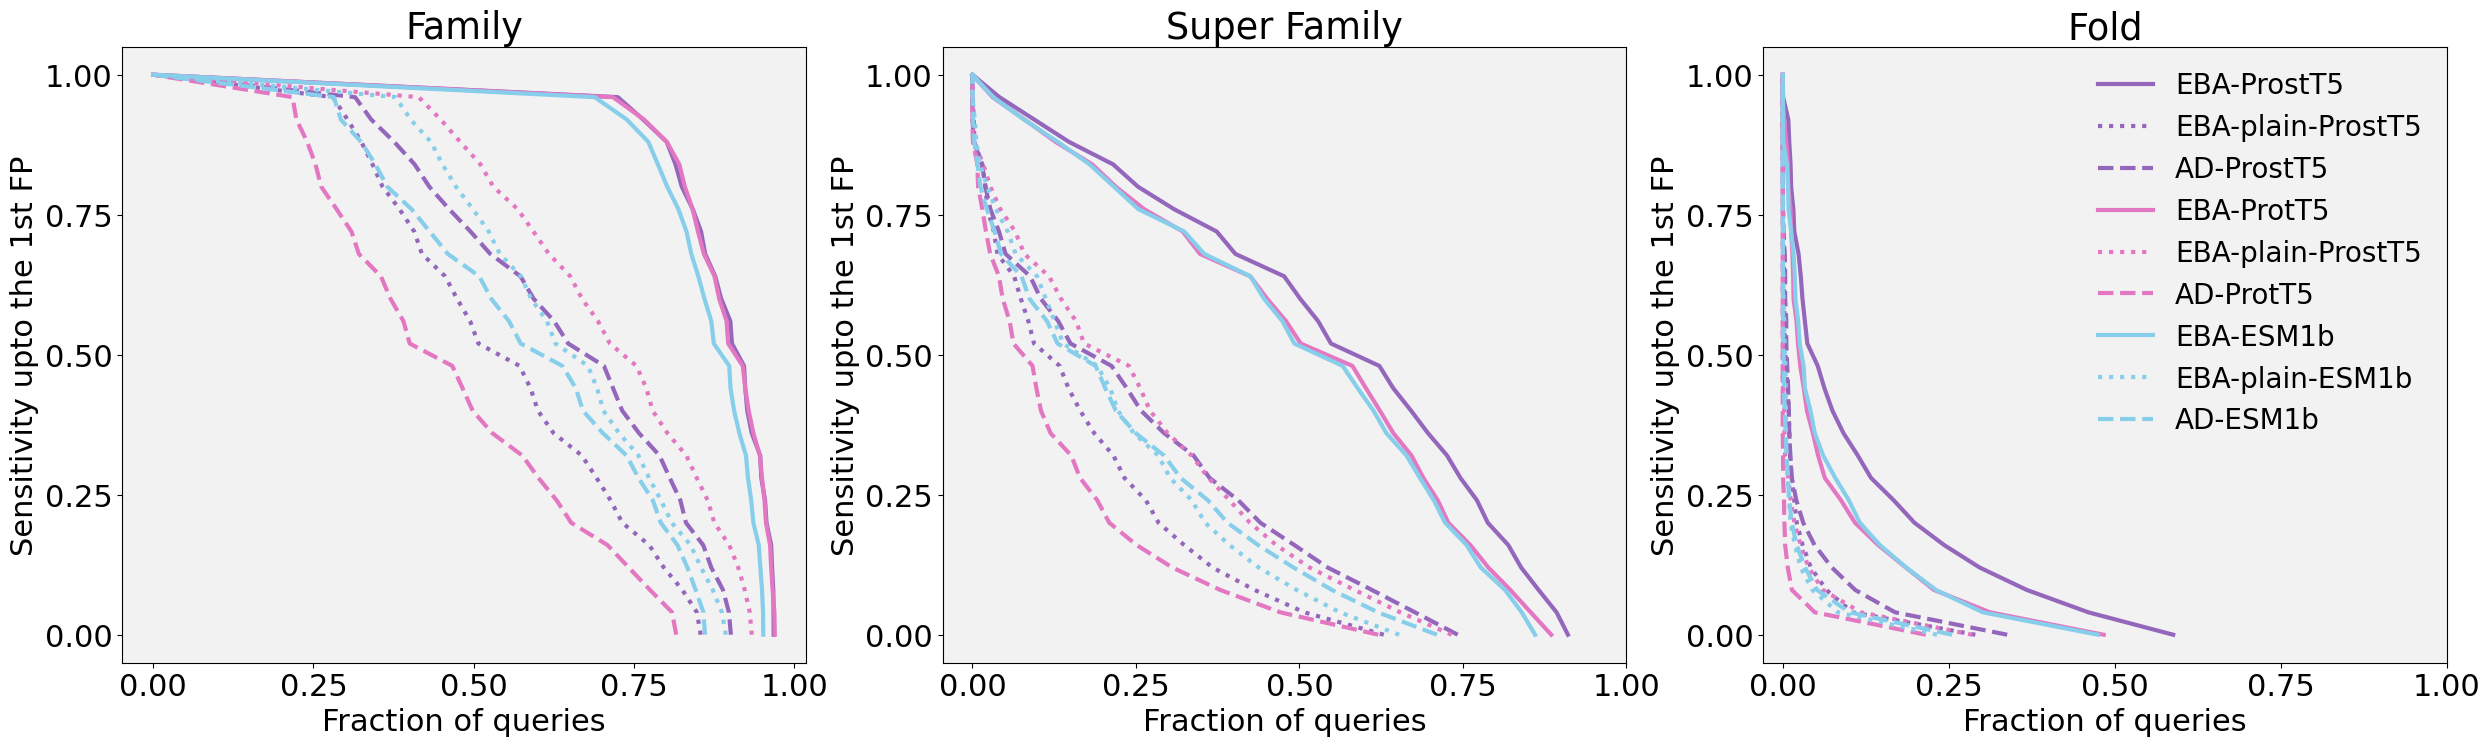

In [14]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 3, figsize=(30, 8))
for ax, plot_type, plot_name in zip(axs, ["FAM", "SFAM", "FOLD"], ["Family", "Super Family", "Fold"]):
    ax.set_facecolor(background_color)
    for label in names_pLMs:
        x = []
        y = []
        for i in np.arange(0., 1.04, 0.04):
            x.append(sum(tables[label][plot_type] > i) / len(tables[label][plot_type]))
            y.append(i)
        ax.plot(x, y, label=legend[label], color=colors[label],linestyle=linestyle[label], linewidth=3, markersize=3)
    ax.set_xticks(np.arange(0, 1.25, 0.25));
    ax.set_yticks(np.arange(0, 1.25, 0.25));
    ax.set_xlabel("Fraction of queries")
    ax.set_ylabel("Sensitivity upto the 1st FP")
    ax.set_title(plot_name)
    #ax.spines[['right', 'top']].set_visible(False)
axs[-1].legend(fontsize=20, frameon=False);
#plt.savefig('plots/SCOP_label_transfer_pLMs_comparison.png', dpi=400)